In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Будем учиться считать колбы с нефтью (через findContours)

In [107]:
img = cv2.imread('9ed5653d6f9fabd86ab3465ce0ddb844.jpg')

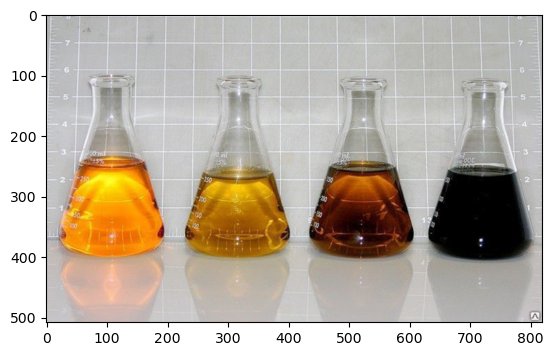

In [108]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [109]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

#метод пороговой обработки для выделения объектов и ищем контуры
_, threshold = cv2.threshold(blurred, 165, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


valid_contours = []
result = img.copy()
for contour in contours:
    if cv2.contourArea(contour) > 3000:  
        valid_contours.append(contour)
        cv2.drawContours(result, [contour], -1, (0, 255, 0), 2)

object_count = len(valid_contours)

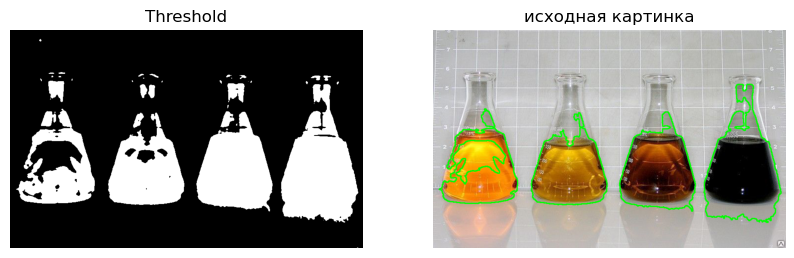

Количество объектов: 4


In [110]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Threshold")
plt.imshow(threshold, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("исходная картинка")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)) 
plt.axis("off")
plt.show()

print(f"Количество объектов: {object_count}")

## Теперь будем учиться считать колбы вторым методом (спойлер: неудачно)

(array([ 22743.,   9485.,   6880.,   9288.,  13160.,  32244.,  61417.,
        223172.,  34124.,   4047.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

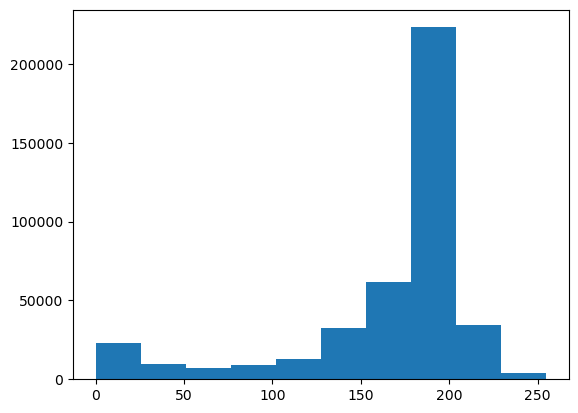

In [68]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.hist( gray.flatten())

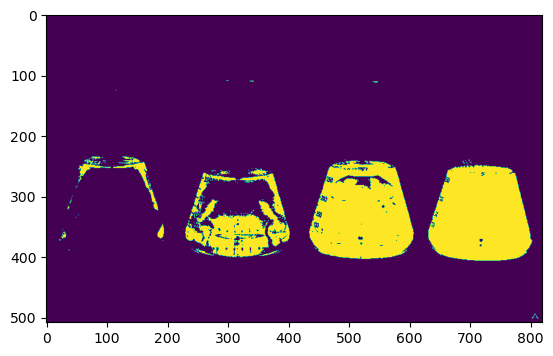

In [69]:
plt.imshow(thresh);

In [101]:
# Применяем клахе для улучшения контраста
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5, 5))
equalized = clahe.apply(gray) 
  
# Применение пороговой обработки с Otsu
_, thresh_otsu = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# edges = cv2.Canny(thresh_otsu, 50, 150)

#Будем выделять с помощью фигуры эллипса
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 20)) 

eroded = cv2.erode(thresh_otsu, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel, iterations=1)

num_labels, markers = cv2.connectedComponents(eroded)

print(f"Количество цилиндров на изображении: {num_labels - 1}") 

Количество цилиндров на изображении: 8


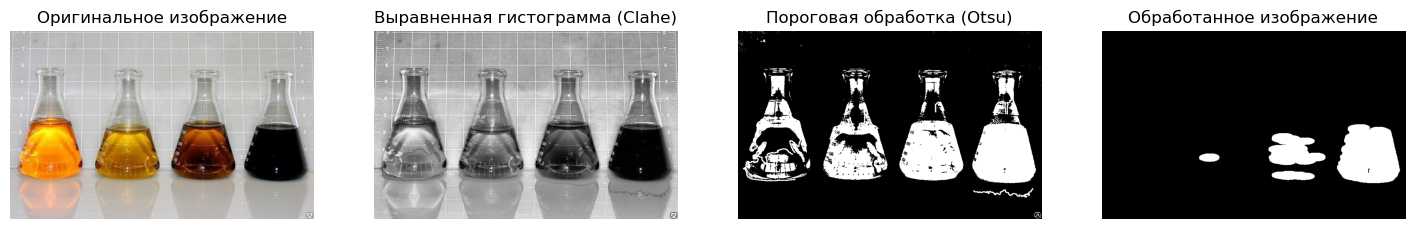

In [111]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.title("Оригинальное изображение")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Выравненная гистограмма (Clahe)")
plt.imshow(equalized, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Пороговая обработка (Otsu)")
plt.imshow(thresh_otsu, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Обработанное изображение")
plt.imshow(dilated, cmap="gray")
plt.axis("off")

plt.show()